In [1]:
import os
import gc
import sys

import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import skimage
from skimage.feature import hog, canny
from skimage.filters import sobel
from skimage import color

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
from keras import layers
import keras.backend as K
from keras.models import Sequential, Model
from keras.preprocessing import image
from keras.layers import Input, Dense, Activation, Dropout
from keras.layers import Flatten, BatchNormalization, Conv2D
from keras.layers import MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D
from keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications import ResNet50


from PIL import Image
from tqdm import tqdm
import random as rnd

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from numpy import expand_dims

!pip install livelossplot
from livelossplot import PlotLossesKeras

%matplotlib inline

2025-04-12 12:06:10.305412: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744459570.547706      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744459570.614658      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Train samples:  6252
Test samples:  2680


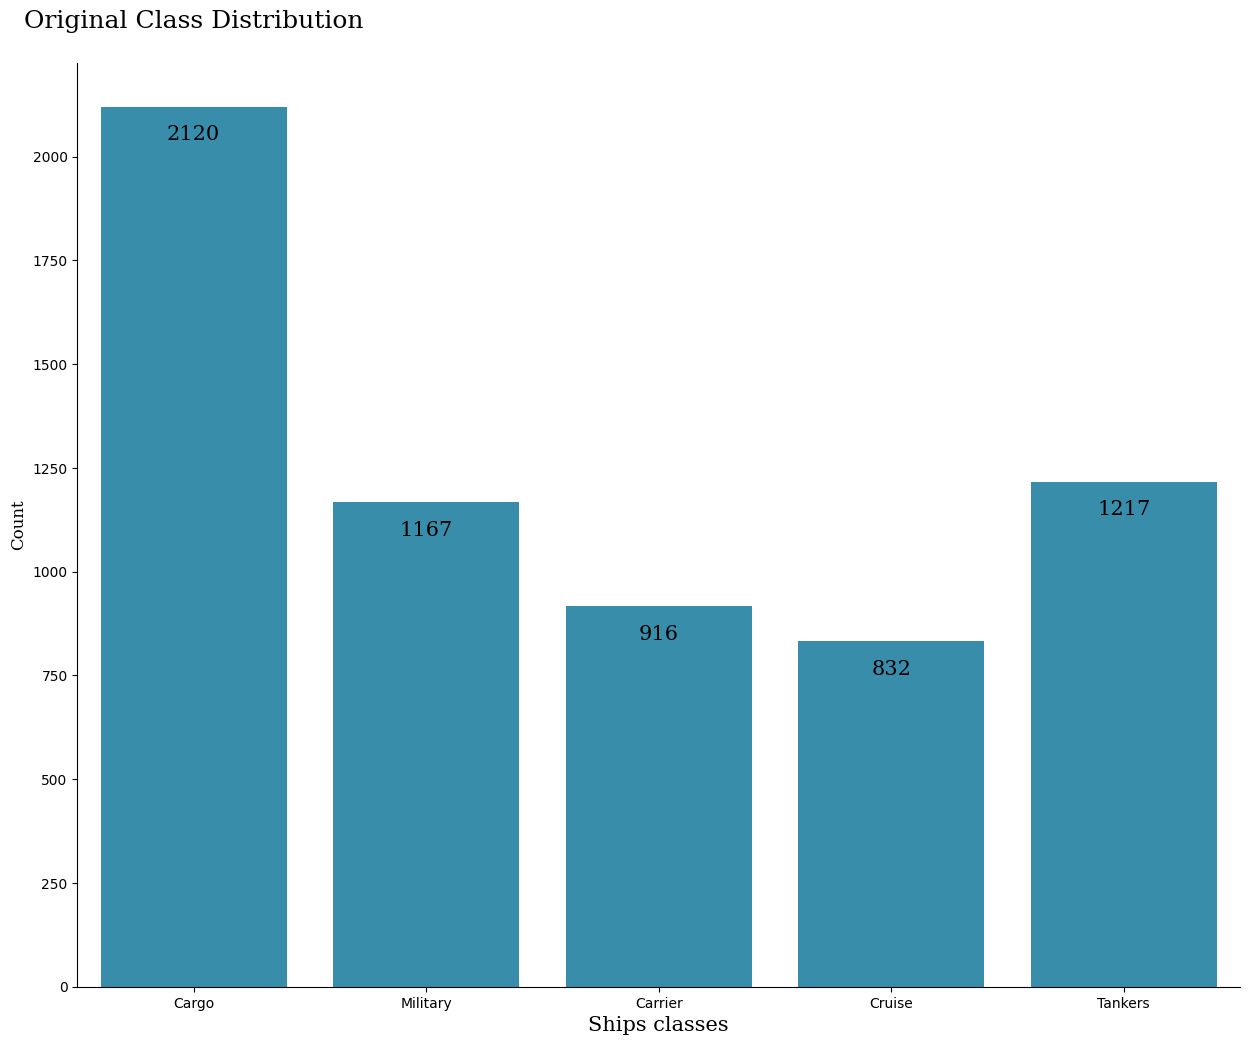

Augmenting Tankers (Pass 1): 100%|██████████| 1217/1217 [00:36<00:00, 33.03it/s]


Augmented dataset saved to /kaggle/working/augmented_train.csv

Class distribution after augmentation:
classes
Cargo       3000
Military    3000
Carrier     3000
Cruise      3000
Tankers     3000
Name: count, dtype: int64
Found 12000 validated image filenames belonging to 5 classes.
Found 3000 validated image filenames belonging to 5 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1744459792.981228      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1744459792.981932      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

Model Summary for custom_cnn:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 224, 224, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 112, 112, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 56, 56, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 28, 28, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      25,690,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │           2,565 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,085,573 (99.51 MB)

 Trainable params: 26,083,589 (99.50 MB)

 Non-trainable params: 1,984 (7.75 KB)


Model Summary for vgg16:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │           2,565 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,564,869 (105.15 MB)

 Trainable params: 19,928,581 (76.02 MB)

 Non-trainable params: 7,636,288 (29.13 MB)


Model Summary for resnet50:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 5)                   │           2,565 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,641,413 (94.00 MB)

 Trainable params: 5,518,341 (21.05 MB)

 Non-trainable params: 19,123,072 (72.95 MB)


Model Summary for inception:


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)            │ (None, 5, 5, 2048)          │      21,802,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_101              │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 5)                   │           2,565 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,856,485 (87.19 MB)

 Trainable params: 1,052,869 (4.02 MB)

 Non-trainable params: 21,803,616 (83.17 MB)


Model Summary for mobilenet:


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_224 (Functional)      │ (None, 7, 7, 1024)          │       3,228,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 1024)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_102              │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 5)                   │           2,565 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,758,277 (14.34 MB)

 Trainable params: 1,581,061 (6.03 MB)

 Non-trainable params: 2,177,216 (8.31 MB)

Saved custom_cnn architecture to /kaggle/working/custom_cnn_architecture.h5
Saved vgg16 architecture to /kaggle/working/vgg16_architecture.h5
Saved resnet50 architecture to /kaggle/working/resnet50_architecture.h5
Saved inception architecture to /kaggle/working/inception_architecture.h5
Saved mobilenet architecture to /kaggle/working/mobilenet_architecture.h5


In [2]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from PIL import Image
import random as rnd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3, MobileNet
from tensorflow.keras.applications.vgg16 import preprocess_input

# Install additional library (if not pre-installed)
# !pip install livelossplot  # Uncomment if needed, but Kaggle may have it pre-installed

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load dataset (assuming uploaded to Kaggle dataset)
# Replace with your dataset name if different
dataset_path = '/kaggle/input/game-of-deep-learning-ship-datasets'
main_path = os.path.join(dataset_path, 'train', 'images')
main_df = pd.read_csv(os.path.join(dataset_path, 'train', 'train.csv'))  # Read CSV into DataFrame
main_df['path'] = main_df['image'].apply(lambda x: os.path.join(main_path, x))  # Correct path using 'image' column

test_df = pd.read_csv(os.path.join(dataset_path, 'test_ApKoW4T.csv'))
test_df['path'] = test_df['image'].apply(lambda x: os.path.join(main_path, x))

print('Train samples: ', len(main_df))
print('Test samples: ', len(test_df))

# Visualize original class distribution
plt.figure(figsize=(15, 12))
plot = sns.countplot(x=main_df['category'].map({1: 'Cargo', 2: 'Military', 3: 'Carrier', 4: 'Cruise', 5: 'Tankers'}), color='#2596be')
sns.despine()
plot.set_title('Original Class Distribution\n', font='serif', x=0.1, y=1, fontsize=18)
plot.set_ylabel("Count", x=0.02, font='serif', fontsize=12)
plot.set_xlabel("Ships classes", fontsize=15, font='serif')
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='center', xytext=(0, -20), font='serif', textcoords='offset points', size=15)
plt.show()

# Map categories to class names
categorys = {1: 'Cargo', 2: 'Military', 3: 'Carrier', 4: 'Cruise', 5: 'Tankers'}
main_df['classes'] = main_df['category'].map(categorys)

# Augment to exactly 3000 samples per class
target_samples = 3000
augmented_dir = '/kaggle/working/augmented_images'
os.makedirs(augmented_dir, exist_ok=True)
for cls in categorys.values():
    os.makedirs(os.path.join(augmented_dir, cls), exist_ok=True)

datagen = ImageDataGenerator(
    rotation_range=40, zoom_range=0.3, brightness_range=[0.4, 1.6],
    channel_shift_range=15.0, width_shift_range=0.3, height_shift_range=0.3,
    shear_range=0.3, horizontal_flip=True, fill_mode='nearest'
)

def augment_class(df_class, class_name, target_samples):
    class_df = df_class[df_class['classes'] == class_name].copy()
    current_samples = len(class_df)
    if current_samples >= target_samples:
        return class_df.sample(n=target_samples, random_state=42)
    
    additional_samples = target_samples - current_samples
    augmented_paths = []
    
    # Initial augmentation pass
    for idx, row in tqdm(class_df.iterrows(), total=current_samples, desc=f"Augmenting {class_name} (Pass 1)"):
        img = load_img(row['path'], target_size=(224, 224))
        img_array = img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        samples_per_image = additional_samples // current_samples
        if idx < (additional_samples % current_samples):
            samples_per_image += 1
        
        for i in range(samples_per_image):
            x = datagen.flow(img_array, batch_size=1)
            img = x.__next__()
            save_path = os.path.join(augmented_dir, class_name, f'aug_{class_name}_{idx}_{i}.jpg')
            Image.fromarray((img[0] * 255).astype(np.uint8)).save(save_path)
            augmented_paths.append(save_path)
    
    # Adjust to exactly 3000 if short
    current_total = len(class_df) + len(augmented_paths)
    while current_total < target_samples:
        idx = rnd.randint(0, current_samples - 1)
        row = class_df.iloc[idx]
        img = load_img(row['path'], target_size=(224, 224))
        img_array = img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        x = datagen.flow(img_array, batch_size=1)
        img = x.__next__()
        save_path = os.path.join(augmented_dir, class_name, f'aug_{class_name}_extra_{current_total - len(class_df)}.jpg')
        Image.fromarray((img[0] * 255).astype(np.uint8)).save(save_path)
        augmented_paths.append(save_path)
        current_total += 1
    
    # Truncate if overshot
    if current_total > target_samples:
        augmented_paths = augmented_paths[:target_samples - len(class_df)]
    
    category_value = [k for k, v in categorys.items() if v == class_name][0]
    aug_df = pd.DataFrame({
        'path': augmented_paths,
        'category': [category_value + 1] * len(augmented_paths),
        'classes': [class_name] * len(augmented_paths)
    })
    return pd.concat([class_df, aug_df], ignore_index=True)

# Augment each class
augmented_df = pd.DataFrame(columns=main_df.columns)
for class_name in categorys.values():
    class_df = main_df[main_df['classes'] == class_name]
    augmented_class_df = augment_class(class_df, class_name, target_samples)
    augmented_df = pd.concat([augmented_df, augmented_class_df], ignore_index=True)

# Save and verify
augmented_df.to_csv('/kaggle/working/augmented_train.csv', index=False)  # Save to writable directory
print("Augmented dataset saved to /kaggle/working/augmented_train.csv")

# Check class distribution
print("\nClass distribution after augmentation:")
print(augmented_df['classes'].value_counts())

# Split into train and validation sets
X, y = augmented_df[['path', 'classes']], augmented_df['classes']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Set up ImageDataGenerators
train_datagen = ImageDataGenerator(
    rotation_range=40, zoom_range=0.3, brightness_range=[0.5, 1.5],
    channel_shift_range=10.0, width_shift_range=0.25, height_shift_range=0.25,
    shear_range=0.25, horizontal_flip=True, fill_mode='nearest',
    preprocessing_function=preprocess_input
)
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_dataframe(
    X_train, x_col='path', y_col='classes', target_size=(224, 224),
    batch_size=32, class_mode='categorical', shuffle=True
)
val_generator = val_datagen.flow_from_dataframe(
    X_val, x_col='path', y_col='classes', target_size=(224, 224),
    batch_size=32, class_mode='categorical', shuffle=False
)

# Define models
custom_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3), padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(5, activation='softmax')
])

vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in vgg16_base.layers[:-4]:
    layer.trainable = False
vgg16 = Sequential([
    vgg16_base,
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(5, activation='softmax')
])

resnet50_base = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in resnet50_base.layers[:-10]:
    layer.trainable = False
resnet50 = Sequential([
    resnet50_base,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(5, activation='softmax')
])

inception_base = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in inception_base.layers[:-10]:
    layer.trainable = False
inception = Sequential([
    inception_base,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(5, activation='softmax')
])

mobilenet_base = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in mobilenet_base.layers[:-5]:
    layer.trainable = False
mobilenet = Sequential([
    mobilenet_base,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(5, activation='softmax')
])

# Store models in a dictionary
models = {
    'custom_cnn': custom_cnn,
    'vgg16': vgg16,
    'resnet50': resnet50,
    'inception': inception,
    'mobilenet': mobilenet
}

# Summary of models
for name, model in models.items():
    print(f"\nModel Summary for {name}:")
    model.summary()

# Save model architectures
for name, model in models.items():
    model.save(f'/kaggle/working/{name}_architecture.h5')
    print(f"Saved {name} architecture to /kaggle/working/{name}_architecture.h5")

In [3]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.models import load_model
import os
import matplotlib.pyplot as plt

# Assume models (custom_cnn, vgg16, resnet50, inception, mobilenet) are defined
# Assume train_generator and val_generator are set up from previous steps

# Callbacks
def get_callbacks(model_name):
    return [
        EarlyStopping(monitor='val_accuracy', patience= 5, restore_best_weights=True, mode='max'),
        ModelCheckpoint(f'/kaggle/working/best_{model_name}.keras', monitor='val_accuracy', save_best_only=True, mode='max'),
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)
    ]

# Function to train and save model
def train_model(model, model_name, epochs=50):
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(
        train_generator,
        validation_data=val_generator,
        epochs=epochs,
        callbacks=get_callbacks(model_name),
        verbose=1
    )
    model.load_weights(f'/kaggle/working/best_{model_name}.keras')
    model.save(f'/kaggle/working/final_{model_name}.keras')
    return model, history

# Train all models
models = {
    'custom_cnn': custom_cnn,
    'vgg16': vgg16,
    'resnet50': resnet50,
    'inception': inception,
    'mobilenet': mobilenet
}

trained_models = {}
histories = {}
for name, model in models.items():
    print(f"\nTraining {name}...")
    trained_models[name], histories[name] = train_model(model, name)




Training custom_cnn...
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1744459813.066998      69 service.cc:148] XLA service 0x7b0fe0007d80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1744459813.067910      69 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1744459813.067930      69 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1744459813.701884      69 cuda_dnn.cc:529] Loaded cuDNN version 90300


  2/375 ━━━━━━━━━━━━━━━━━━━━ 33s 91ms/step - accuracy: 0.1797 - loss: 3.3743   

I0000 00:00:1744459820.588381      69 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


375/375 ━━━━━━━━━━━━━━━━━━━━ 190s 463ms/step - accuracy: 0.2532 - loss: 2.5297 - val_accuracy: 0.3500 - val_loss: 1.7888 - learning_rate: 1.0000e-04
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 176s 460ms/step - accuracy: 0.3084 - loss: 2.0019 - val_accuracy: 0.4603 - val_loss: 1.4680 - learning_rate: 1.0000e-04
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 171s 448ms/step - accuracy: 0.3542 - loss: 1.8300 - val_accuracy: 0.4880 - val_loss: 1.3457 - learning_rate: 1.0000e-04
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 171s 448ms/step - accuracy: 0.3863 - loss: 1.6994 - val_accuracy: 0.5070 - val_loss: 1.2734 - learning_rate: 1.0000e-04
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 172s 451ms/step - accuracy: 0.3959 - loss: 1.6476 - val_accuracy: 0.5233 - val_loss: 1.2413 - learning_rate: 1.0000e-04
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 172s 451ms/step - accuracy: 0.4258 - loss: 1.5447 - val_accuracy: 0.5610 - val_loss: 1.2329 - learning_rate: 1.0000e-04
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 173s 452ms/

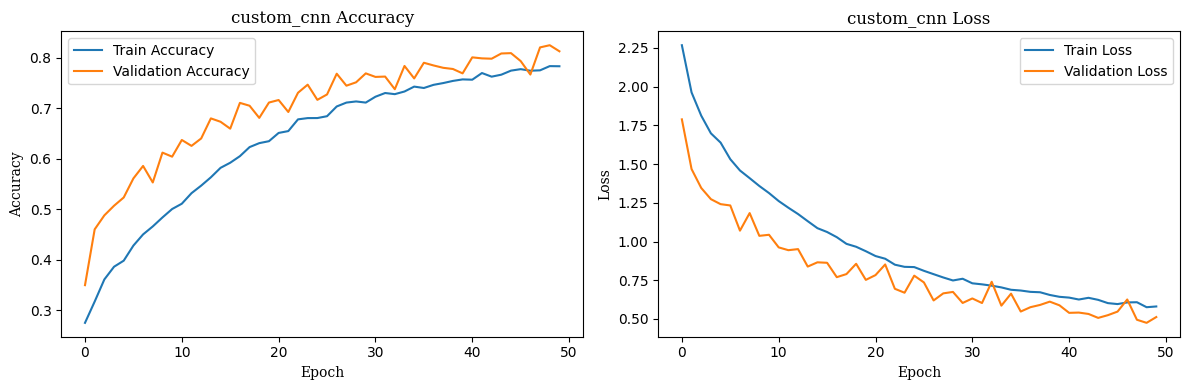

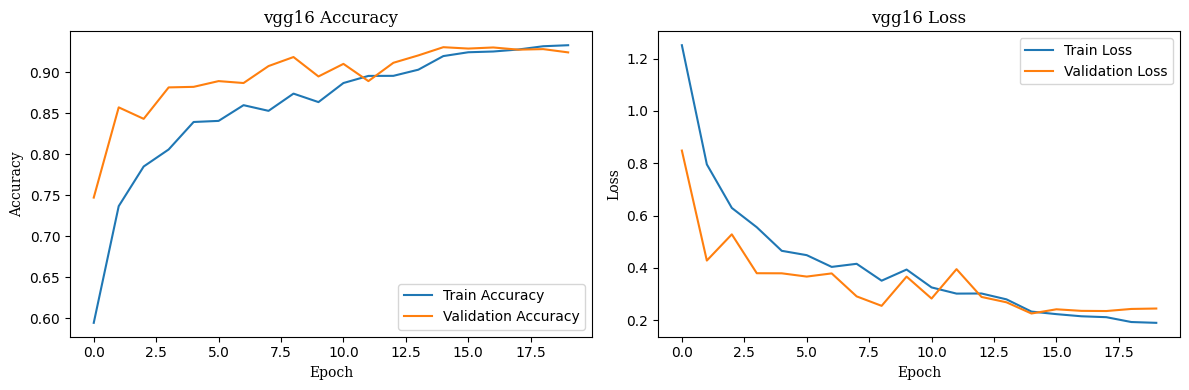

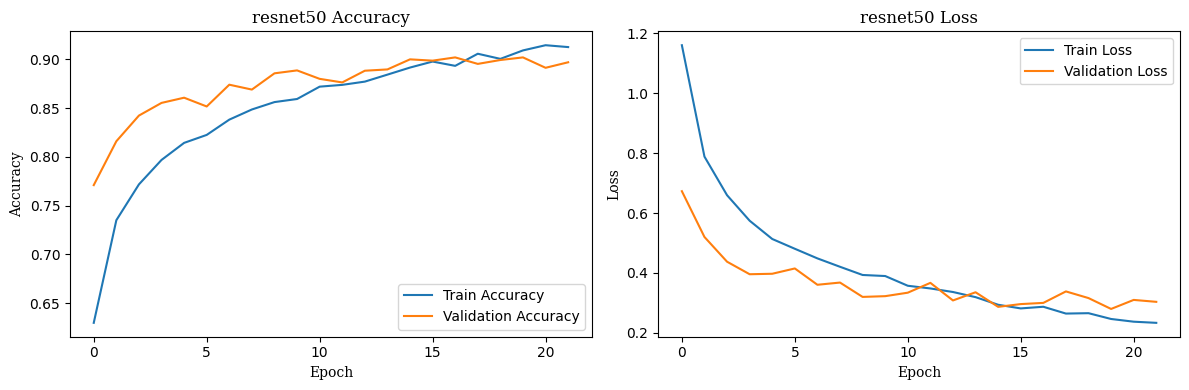

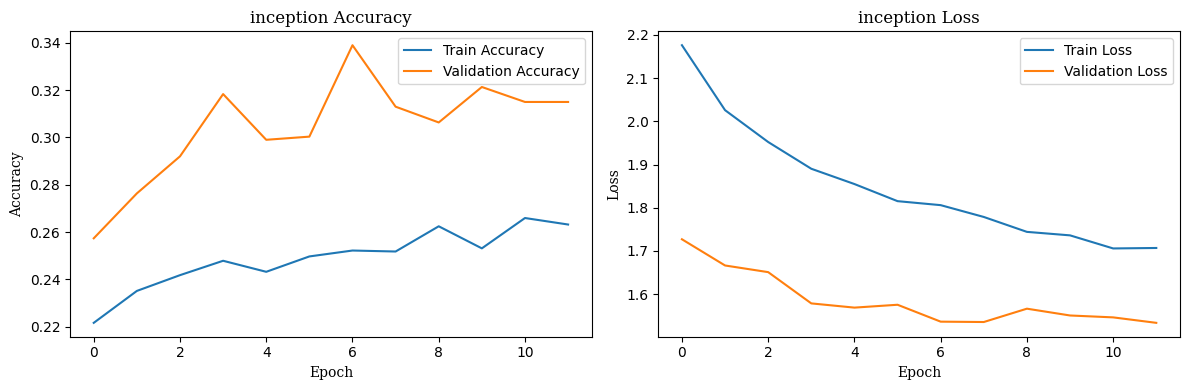

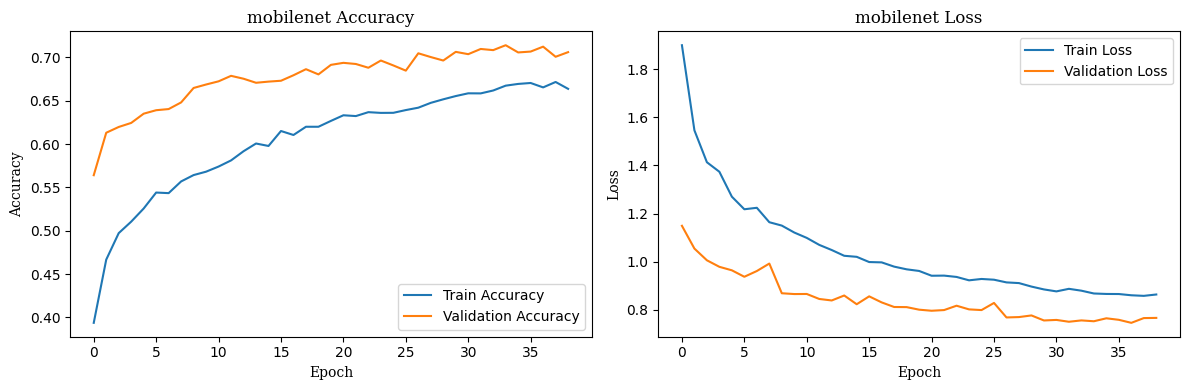

Best validation accuracy for custom_cnn: 0.8243
Best validation accuracy for vgg16: 0.9303
Best validation accuracy for resnet50: 0.9020
Best validation accuracy for inception: 0.3390
Best validation accuracy for mobilenet: 0.7140


In [4]:
# Plot training history
for name, history in histories.items():
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{name} Accuracy', font='serif', fontsize=12)
    plt.xlabel('Epoch', font='serif')
    plt.ylabel('Accuracy', font='serif')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{name} Loss', font='serif', fontsize=12)
    plt.xlabel('Epoch', font='serif')
    plt.ylabel('Loss', font='serif')
    plt.legend()
    plt.tight_layout()
    plt.savefig(f'/kaggle/working/{name}_training_plots.png', dpi=300)
    plt.show()

# Print best validation accuracy for each model
for name, history in histories.items():
    best_val_acc = max(history.history['val_accuracy'])
    print(f"Best validation accuracy for {name}: {best_val_acc:.4f}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 86ms/step

custom_cnn Performance Metrics:
Accuracy: 0.8243
Top-2 Accuracy: 0.9480
Weighted Precision: 0.8235
Weighted Recall: 0.8243
Weighted F1-Score: 0.8231
Cohen's Kappa: 0.7804

Per-Class Metrics:
Cargo:
  Precision: 0.7670
  Recall: 0.7133
  F1-Score: 0.7392
  Support: 600
Military:
  Precision: 0.8932
  Recall: 0.9200
  F1-Score: 0.9064
  Support: 600
Carrier:
  Precision: 0.8862
  Recall: 0.8567
  F1-Score: 0.8712
  Support: 600
Cruise:
  Precision: 0.8054
  Recall: 0.8967
  F1-Score: 0.8486
  Support: 600
Tankers:
  Precision: 0.7656
  Recall: 0.7350
  F1-Score: 0.7500
  Support: 600


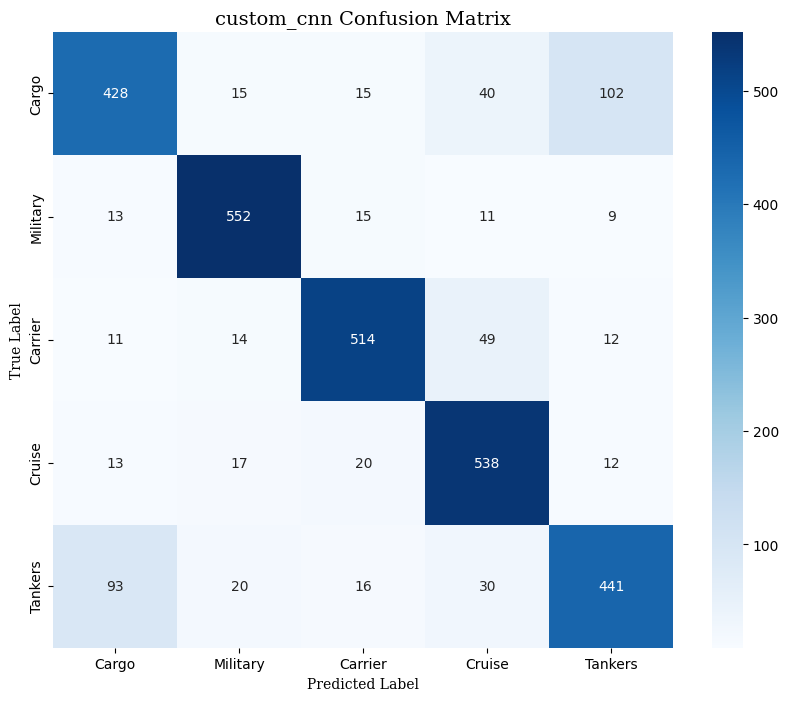

Confusion Matrix saved as custom_cnn_confusion_matrix.png in /kaggle/working/


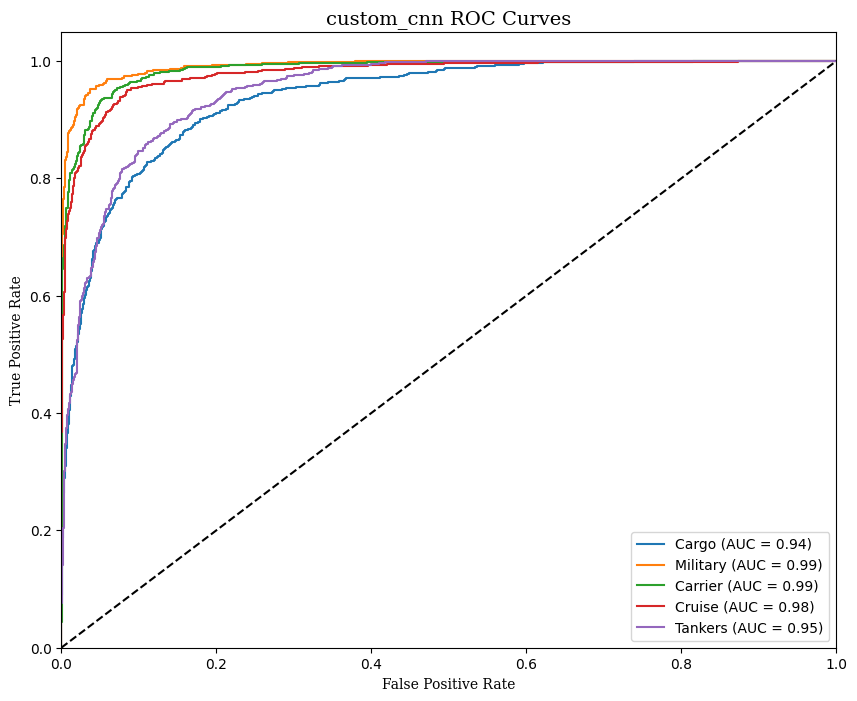

ROC Curves saved as custom_cnn_roc_curves.png in /kaggle/working/
94/94 ━━━━━━━━━━━━━━━━━━━━ 19s 200ms/step

vgg16 Performance Metrics:
Accuracy: 0.9303
Top-2 Accuracy: 0.9843
Weighted Precision: 0.9309
Weighted Recall: 0.9303
Weighted F1-Score: 0.9305
Cohen's Kappa: 0.9129

Per-Class Metrics:
Cargo:
  Precision: 0.8615
  Recall: 0.8917
  F1-Score: 0.8763
  Support: 600
Military:
  Precision: 0.9670
  Recall: 0.9767
  F1-Score: 0.9718
  Support: 600
Carrier:
  Precision: 0.9780
  Recall: 0.9633
  F1-Score: 0.9706
  Support: 600
Cruise:
  Precision: 0.9694
  Recall: 0.9517
  F1-Score: 0.9605
  Support: 600
Tankers:
  Precision: 0.8786
  Recall: 0.8683
  F1-Score: 0.8734
  Support: 600


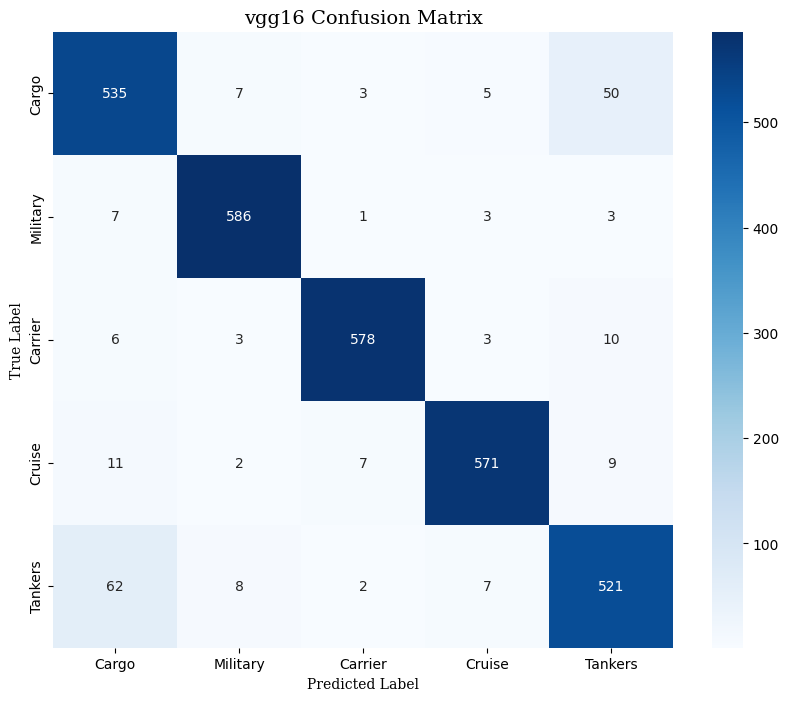

Confusion Matrix saved as vgg16_confusion_matrix.png in /kaggle/working/


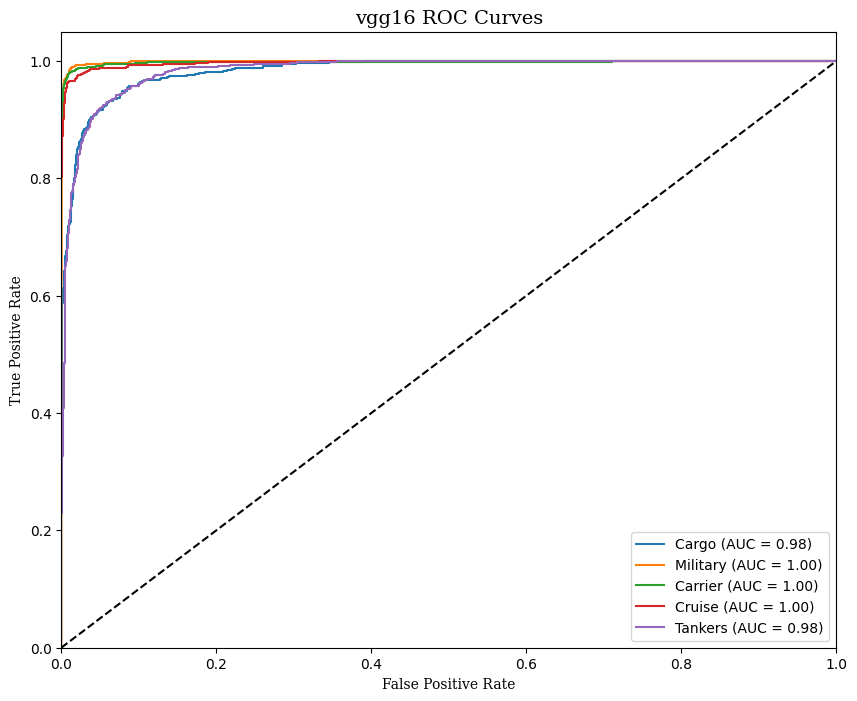

ROC Curves saved as vgg16_roc_curves.png in /kaggle/working/
94/94 ━━━━━━━━━━━━━━━━━━━━ 18s 135ms/step

resnet50 Performance Metrics:
Accuracy: 0.9020
Top-2 Accuracy: 0.9743
Weighted Precision: 0.9028
Weighted Recall: 0.9020
Weighted F1-Score: 0.9014
Cohen's Kappa: 0.8775

Per-Class Metrics:
Cargo:
  Precision: 0.8805
  Recall: 0.7733
  F1-Score: 0.8234
  Support: 600
Military:
  Precision: 0.9584
  Recall: 0.9600
  F1-Score: 0.9592
  Support: 600
Carrier:
  Precision: 0.9443
  Recall: 0.9600
  F1-Score: 0.9521
  Support: 600
Cruise:
  Precision: 0.9198
  Recall: 0.9367
  F1-Score: 0.9282
  Support: 600
Tankers:
  Precision: 0.8111
  Recall: 0.8800
  F1-Score: 0.8441
  Support: 600


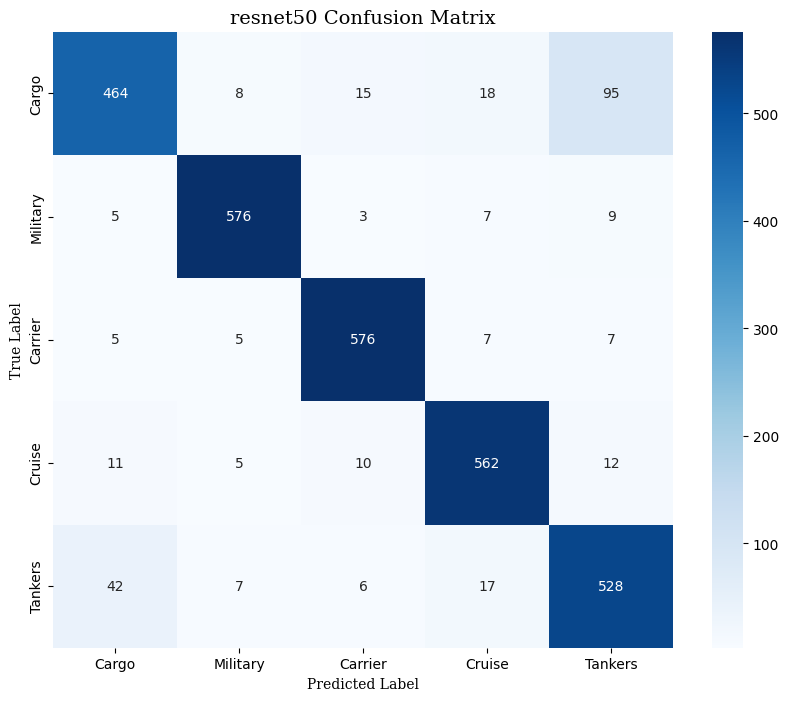

Confusion Matrix saved as resnet50_confusion_matrix.png in /kaggle/working/


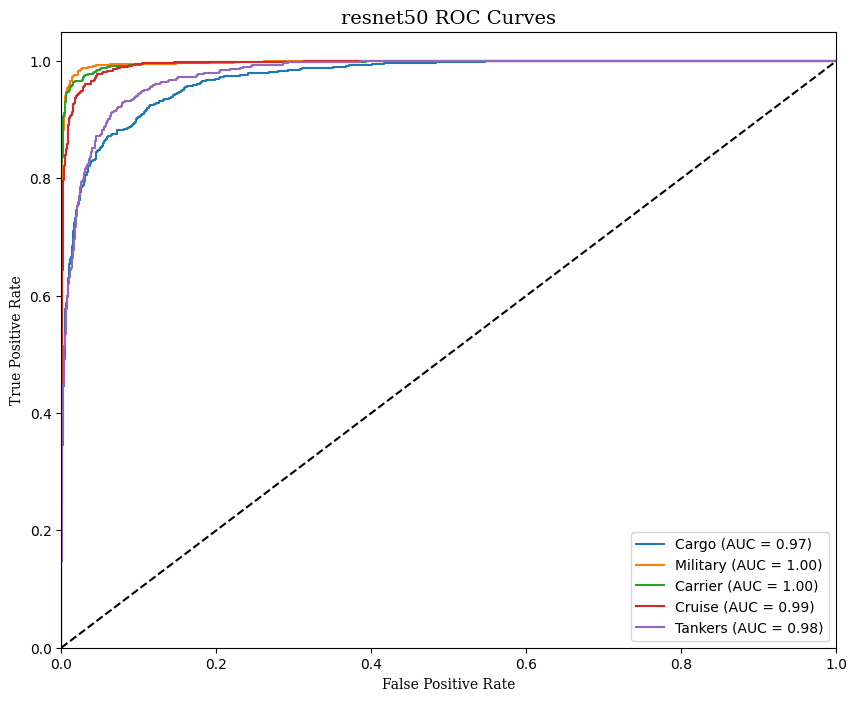

ROC Curves saved as resnet50_roc_curves.png in /kaggle/working/
94/94 ━━━━━━━━━━━━━━━━━━━━ 22s 164ms/step

inception Performance Metrics:
Accuracy: 0.3390
Top-2 Accuracy: 0.5693
Weighted Precision: 0.3369
Weighted Recall: 0.3390
Weighted F1-Score: 0.3202
Cohen's Kappa: 0.1737

Per-Class Metrics:
Cargo:
  Precision: 0.3712
  Recall: 0.4517
  F1-Score: 0.4075
  Support: 600
Military:
  Precision: 0.3267
  Recall: 0.5167
  F1-Score: 0.4003
  Support: 600
Carrier:
  Precision: 0.3250
  Recall: 0.3233
  F1-Score: 0.3241
  Support: 600
Cruise:
  Precision: 0.3376
  Recall: 0.3083
  F1-Score: 0.3223
  Support: 600
Tankers:
  Precision: 0.3239
  Recall: 0.0950
  F1-Score: 0.1469
  Support: 600


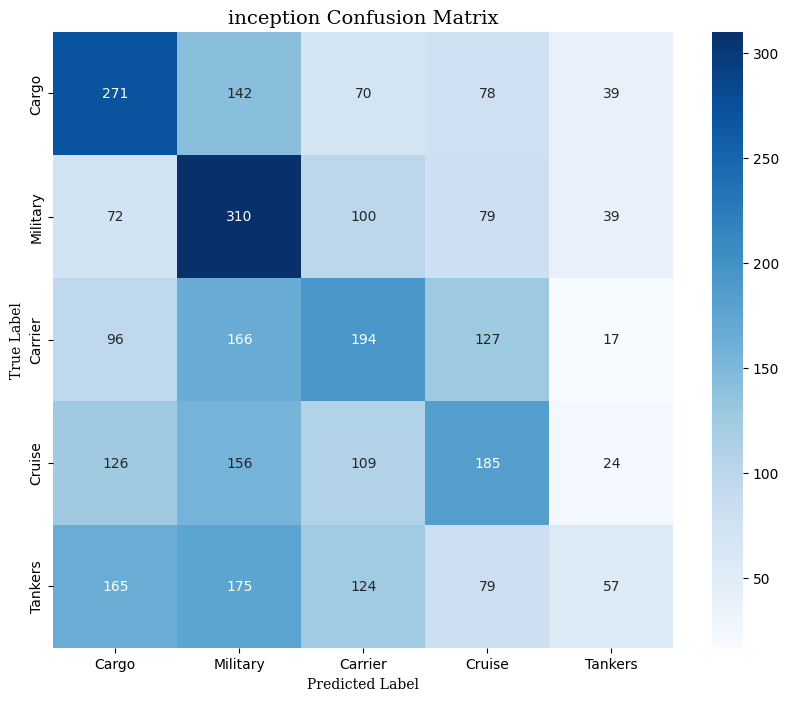

Confusion Matrix saved as inception_confusion_matrix.png in /kaggle/working/


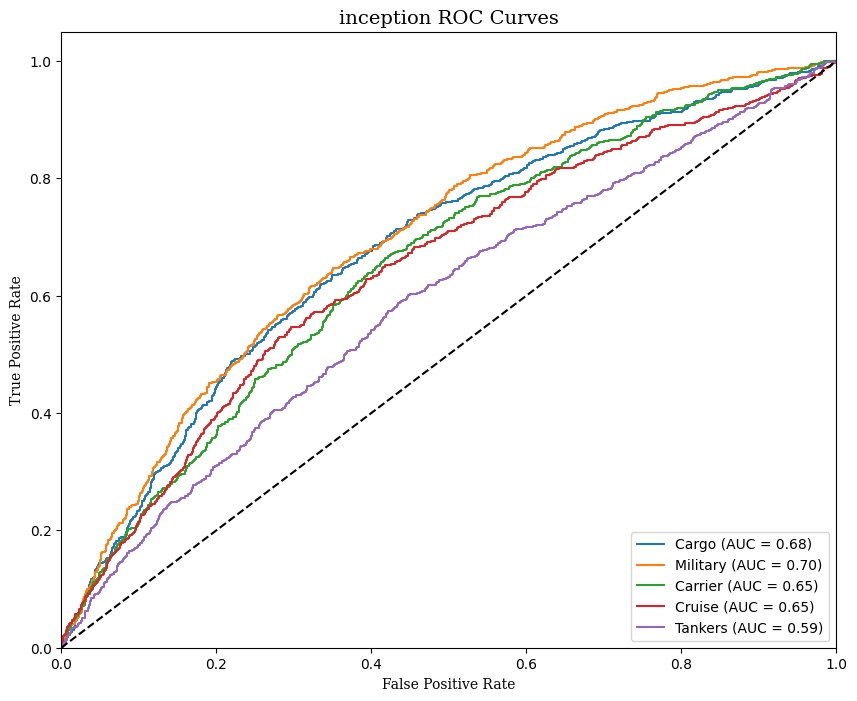

ROC Curves saved as inception_roc_curves.png in /kaggle/working/
94/94 ━━━━━━━━━━━━━━━━━━━━ 14s 128ms/step

mobilenet Performance Metrics:
Accuracy: 0.7140
Top-2 Accuracy: 0.8667
Weighted Precision: 0.7150
Weighted Recall: 0.7140
Weighted F1-Score: 0.7098
Cohen's Kappa: 0.6425

Per-Class Metrics:
Cargo:
  Precision: 0.7191
  Recall: 0.5717
  F1-Score: 0.6370
  Support: 600
Military:
  Precision: 0.7704
  Recall: 0.8500
  F1-Score: 0.8082
  Support: 600
Carrier:
  Precision: 0.6741
  Recall: 0.8550
  F1-Score: 0.7539
  Support: 600
Cruise:
  Precision: 0.7869
  Recall: 0.7200
  F1-Score: 0.7520
  Support: 600
Tankers:
  Precision: 0.6243
  Recall: 0.5733
  F1-Score: 0.5977
  Support: 600


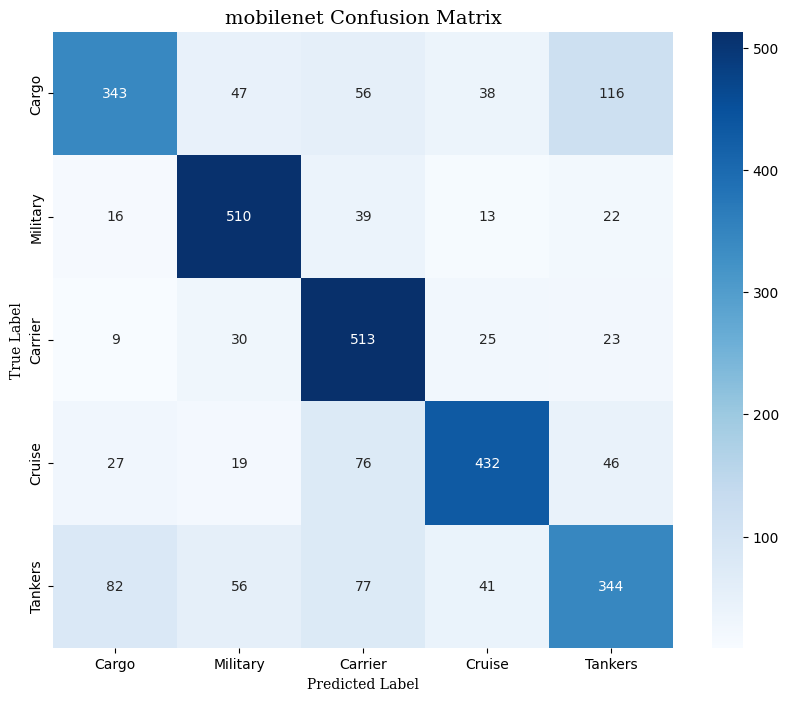

Confusion Matrix saved as mobilenet_confusion_matrix.png in /kaggle/working/


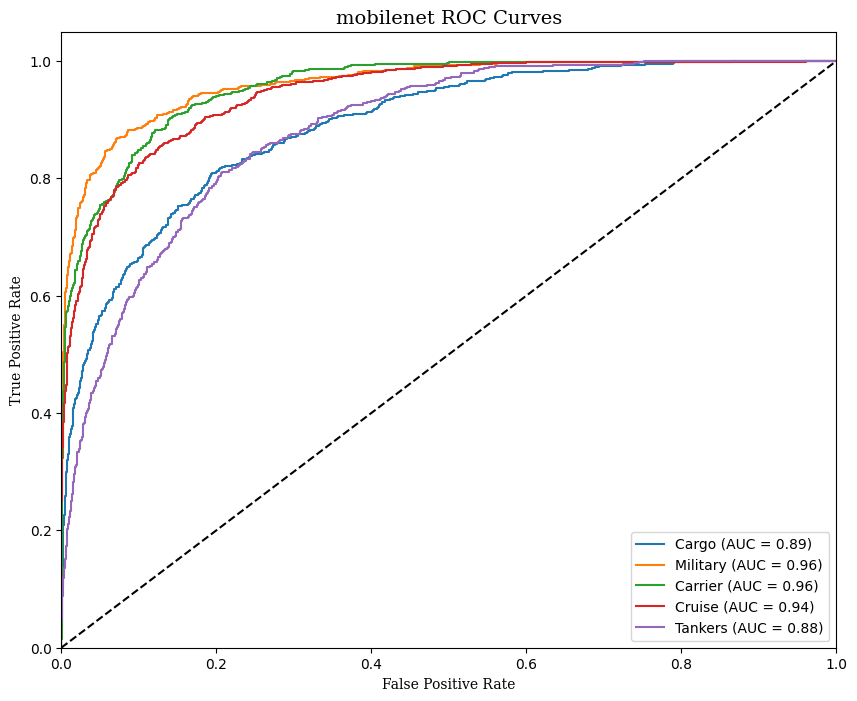

ROC Curves saved as mobilenet_roc_curves.png in /kaggle/working/

Summary of Model Performance:
        Model  Accuracy  Top-2 Accuracy  Precision    Recall  F1-Score  \
0  custom_cnn  0.824333        0.948000   0.823490  0.824333  0.823075   
1       vgg16  0.930333        0.984333   0.930907  0.930333  0.930530   
2    resnet50  0.902000        0.974333   0.902797  0.902000  0.901395   
3   inception  0.339000        0.569333   0.336861  0.339000  0.320226   
4   mobilenet  0.714000        0.866667   0.714958  0.714000  0.709750   

   Cohen's Kappa  
0       0.780417  
1       0.912917  
2       0.877500  
3       0.173750  
4       0.642500  
Summary saved to /kaggle/working/model_performance_summary.csv


In [5]:
from sklearn.metrics import accuracy_score, cohen_kappa_score, confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import label_binarize
import seaborn as sns
import numpy as np
import pandas as pd

# Evaluate models (as provided in the previous message)
class_labels = ['Cargo', 'Military', 'Carrier', 'Cruise', 'Tankers']

def top_k_accuracy(y_true, y_pred_probs, k=2):
    top_k_preds = np.argsort(y_pred_probs, axis=1)[:, -k:]
    return np.mean([y_true[i] in top_k_preds[i] for i in range(len(y_true))])

def compute_metrics_from_cm(cm, class_labels):
    n_classes = len(class_labels)
    precision_per_class = np.zeros(n_classes)
    recall_per_class = np.zeros(n_classes)
    f1_per_class = np.zeros(n_classes)
    support = cm.sum(axis=1)
    for i in range(n_classes):
        tp = cm[i, i]
        fp = cm[:, i].sum() - tp
        fn = cm[i, :].sum() - tp
        precision_per_class[i] = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall_per_class[i] = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1_per_class[i] = 2 * precision_per_class[i] * recall_per_class[i] / (precision_per_class[i] + recall_per_class[i]) if (precision_per_class[i] + recall_per_class[i]) > 0 else 0
    total_support = support.sum()
    precision_weighted = np.sum(precision_per_class * support) / total_support if total_support > 0 else 0
    recall_weighted = np.sum(recall_per_class * support) / total_support if total_support > 0 else 0
    f1_weighted = np.sum(f1_per_class * support) / total_support if total_support > 0 else 0
    return precision_per_class, recall_per_class, f1_per_class, support, precision_weighted, recall_weighted, f1_weighted

def evaluate_model(model, generator, model_name, class_labels):
    y_pred_probs = model.predict(generator)
    y_pred = np.argmax(y_pred_probs, axis=1)
    y_true = generator.classes
    
    accuracy = accuracy_score(y_true, y_pred)
    top2_accuracy = top_k_accuracy(y_true, y_pred_probs, k=2)
    cm = confusion_matrix(y_true, y_pred)
    precision_per_class, recall_per_class, f1_per_class, support, precision_weighted, recall_weighted, f1_weighted = compute_metrics_from_cm(cm, class_labels)
    kappa = cohen_kappa_score(y_true, y_pred)
    
    print(f"\n{model_name} Performance Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Top-2 Accuracy: {top2_accuracy:.4f}")
    print(f"Weighted Precision: {precision_weighted:.4f}")
    print(f"Weighted Recall: {recall_weighted:.4f}")
    print(f"Weighted F1-Score: {f1_weighted:.4f}")
    print(f"Cohen's Kappa: {kappa:.4f}")
    
    print("\nPer-Class Metrics:")
    for i, cls in enumerate(class_labels):
        print(f"{cls}:")
        print(f"  Precision: {precision_per_class[i]:.4f}")
        print(f"  Recall: {recall_per_class[i]:.4f}")
        print(f"  F1-Score: {f1_per_class[i]:.4f}")
        print(f"  Support: {support[i]}")
    
    # Confusion Matrix Visualization
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title(f'{model_name} Confusion Matrix', font='serif', fontsize=14)
    plt.ylabel('True Label', font='serif')
    plt.xlabel('Predicted Label', font='serif')
    plt.savefig(f'/kaggle/working/{model_name}_confusion_matrix.png', dpi=300, bbox_inches='tight')
    plt.show()
    print(f"Confusion Matrix saved as {model_name}_confusion_matrix.png in /kaggle/working/")
    
    # ROC Curves
    y_true_bin = label_binarize(y_true, classes=range(len(class_labels)))
    plt.figure(figsize=(10, 8))
    for i in range(len(class_labels)):
        fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_probs[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{class_labels[i]} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', font='serif')
    plt.ylabel('True Positive Rate', font='serif')
    plt.title(f'{model_name} ROC Curves', font='serif', fontsize=14)
    plt.legend(loc="lower right")
    plt.savefig(f'/kaggle/working/{model_name}_roc_curves.png', dpi=300, bbox_inches='tight')
    plt.show()
    print(f"ROC Curves saved as {model_name}_roc_curves.png in /kaggle/working/")
    
    return {
        'accuracy': accuracy,
        'top2_accuracy': top2_accuracy,
        'precision': precision_weighted,
        'recall': recall_weighted,
        'f1': f1_weighted,
        'kappa': kappa,
        'cm': cm
    }

# Evaluate all models
results = {}
for name, model in trained_models.items():
    results[name] = evaluate_model(model, val_generator, name, class_labels)

# Summary table
results_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[name]['accuracy'] for name in results],
    'Top-2 Accuracy': [results[name]['top2_accuracy'] for name in results],
    'Precision': [results[name]['precision'] for name in results],
    'Recall': [results[name]['recall'] for name in results],
    'F1-Score': [results[name]['f1'] for name in results],
    'Cohen\'s Kappa': [results[name]['kappa'] for name in results]
})

print("\nSummary of Model Performance:")
print(results_df)
results_df.to_csv('/kaggle/working/model_performance_summary.csv', index=False)
print("Summary saved to /kaggle/working/model_performance_summary.csv")